# Homework 6

## References

+ Lectures 21-23 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

try:
  import GPy
except:
  _=!pip install GPy
  import GPy
import scipy.stats as st

## Student details

+ **First Name: Flavio**
+ **Last Name: Nardi**
+ **Email: fnardi@purdue.edu**

## Problem 1 - Defining priors on function spaces

In this problem we are going to explore further how Gaussian processes can be used to define probability measures over function spaces.
To this end, assume that there is a 1D function, call if $f(x)$, which we do not know.
For simplicity, assume that $x$ takes values in $[0,1]$.
We will employ Gaussian process regression to encode our state of knowledge about $f(x)$ and sample some possibilities for it.
For each of the cases below:
+ assume that $f\sim \operatorname{GP}(m, k)$ and pick a mean ($m(x)$) and a covariance function $f(x)$ that match the provided information.
+ write code that samples a few times (up to five) the values of $f(x)$ at a 100 equidistant points between 0 and 1.

### Part A - Super smooth function with known length scale

Assume that you hold the following beliefs
+ You know that $f(x)$ has as many derivatives as you want and they are all continuous
+ You don't know if $f(x)$ has a specific trend.
+ You think that $f(x)$ has "wiggles" that are approximatly of size $\Delta x=0.1$.
+ You think that $f(x)$ is between -4 and 4.

**Answer:**

**I am doing this for you so that you have a concrete example of what is requested.**

The mean function should be:

$$
m(x) = 0.
$$

The covariance function should be a squared exponential:

$$
k(x,x') = s^2\exp\left\{-\frac{(x-x')^2}{2\ell^2}\right\},
$$

with variance:

$$
s^2 = k(x,x) = \mathbb{V}[f(x)] = 4,
$$

and lengthscale $\ell = 0.1$.
We chose the variance to be 4 so that with (about) 95% probability the values of $f(x)$ are between -4 and 4.

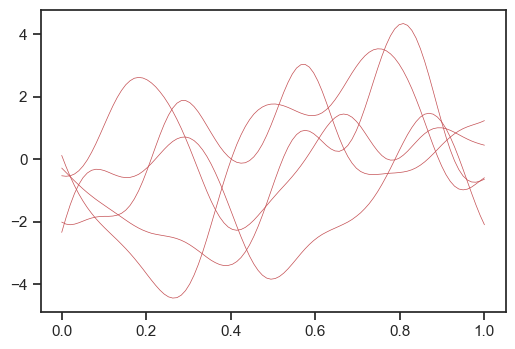

In [2]:
# Define the covariance function
k = GPy.kern.RBF(1)
k.lengthscale = 0.1
k.variance = 4.0
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

### Part B - Super smooth function with known ultra small length scale

Assume that you hold the following beliefs
+ You know that $f(x)$ has as many derivatives as you want and they are all continuous
+ You don't know if $f(x)$ has a specific trend.
+ You think that $f(x)$ has "wiggles" that are approximatly of size $\Delta x=0.05$.
+ You think that $f(x)$ is between -3 and 3.

**Answer:**

The mean function should be:

$$
m(x) = 0.
$$

The covariance function should be a squared exponential:

$$
k(x,x') = s^2\exp\left\{-\frac{(x-x')^2}{2\ell^2}\right\},
$$

with variance:

$$
s^2 = k(x,x) = \mathbb{V}[f(x)] = 3,
$$

and lengthscale $\ell = 0.05$.
We chose the variance to be 3 so that with (about) 95% probability the values of $f(x)$ are between -3 and 3.

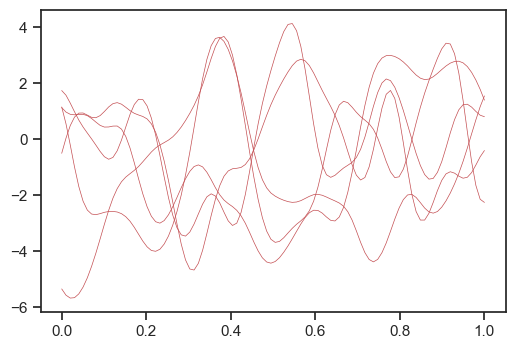

In [3]:
# Define the covariance function
k = GPy.kern.RBF(1)
k.lengthscale = 0.05
k.variance = 3.0
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

### Part C - Continuous function with known length scale

Assume that you hold the following beliefs
+ You know that $f(x)$ is continuous, nowhere differentiable.
+ You don't know if $f(x)$ has a specific trend.
+ You think that $f(x)$ has "wiggles" that are approximatly of size $\Delta x=0.1$.
+ You think that $f(x)$ is between -5 and 5.

Hint: Use ``GPy.kern.Exponential``.

**Answer:**

The mean function should be:

$$
m(x) = 0.
$$

The covariance function should be a exponential:

$$
k(x,x') = s^2\exp\left\{-\frac{(x-x')}{\ell}\right\},
$$

with variance:

$$
s^2 = k(x,x) = \mathbb{V}[f(x)] = 5,
$$

and lengthscale $\ell = 0.1$.
We chose the variance to be 5 so that with (about) 95% probability the values of $f(x)$ are between -5 and 5.

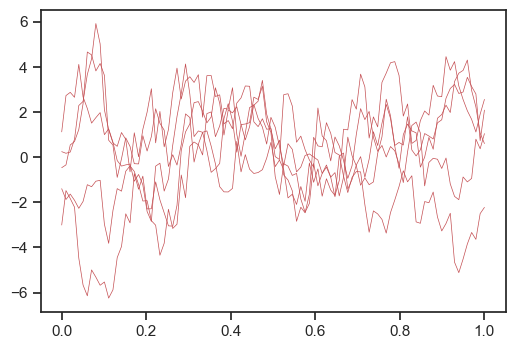

In [4]:
# Define the covariance function
k = GPy.kern.Exponential(1)
k.lengthscale = 0.1
k.variance = 5.0
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

### Part D - Smooth periodic function with known length scale

Assume that you hold the following beliefs
+ You know that $f(x)$ is smooth.
+ You know that $f(x)$ is periodic with period 0.1.
+ You don't know if $f(x)$ has a specific trend.
+ You think that $f(x)$ has "wiggles" that are approximatly of size $\Delta x=0.5$ of the period.
+ You think that $f(x)$ is between -5 and 5.

Hint: Use ``GPy.kern.StdPeriodic``.

**Answer:**

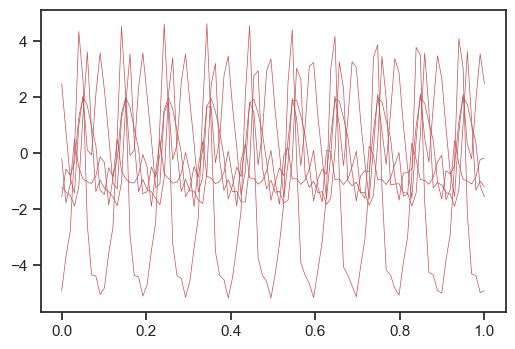

In [5]:
# Define the covariance function
k = GPy.kern.StdPeriodic(1)
k.lengthscale = 0.5
k.variance = 5.0
k.period = 0.1
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

### Part E - Smooth periodic function with known length scale

Assume that you hold the following beliefs
+ You know that $f(x)$ is smooth.
+ You know that $f(x)$ is periodic with period 0.1.
+ You don't know if $f(x)$ has a specific trend.
+ You think that $f(x)$ has "wiggles" that are approximatly of size $\Delta x=0.1$ of the period (**the only thing that is different compared to D**).
+ You think that $f(x)$ is between -5 and 5.

Hint: Use ``GPy.kern.StdPeriodic``.

**Answer:**

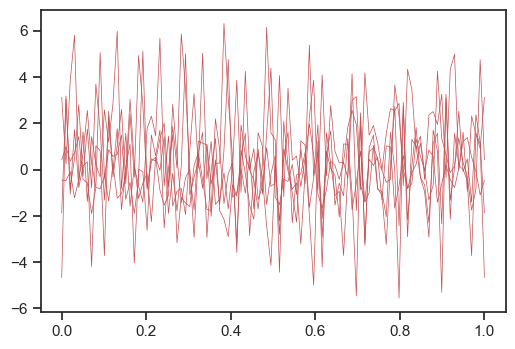

In [6]:
# Define the covariance function
k = GPy.kern.StdPeriodic(1)
k.lengthscale = 0.1
k.variance = 5.0
k.period = 0.1
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

### Part F - The sum of two functions

Assume that you hold the following beliefs
+ You know that $f(x) = f_1(x) + f_2(x)$, where:
    - $f_1(x)$ is smooth with variance 2 and lengthscale 0.5
    - $f_2(x)$ is continuous, nowhere differentiable with variance 0.1 and lengthscale 0.1

Hint: Use must create a new covariance function that is the sum of two other covariances.

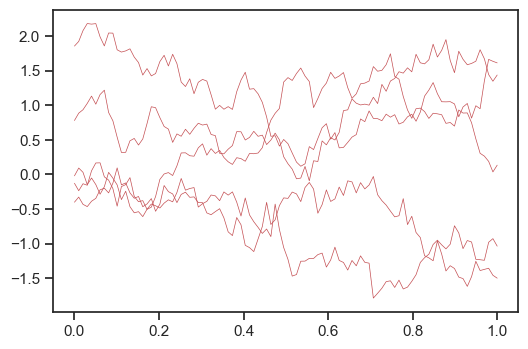

In [7]:
# kernel for f_1
k1 = GPy.kern.RBF(1)
k1.lengthscale = 0.5
k1.variance = 2.0
# kernel for f_2
k2 = GPy.kern.Exponential(1)
k2.lengthscale = 0.1
k2.variance = 0.1
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k1.K(xs[:, None]) + k2.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

### Part G - The product of two functions

Assume that you hold the following beliefs
+ You know that $f(x) = f_1(x)f_2(x)$, where:
    - $f_1(x)$ is smooth, periodic (period = 0.1), lengthscale 0.1 (relative to the period), and variance 2.
    - $f_2(x)$ is smooth with lengthscale 0.5 and variance 1.

Hint: Use must create a new covariance function that is the product of two other covariances.

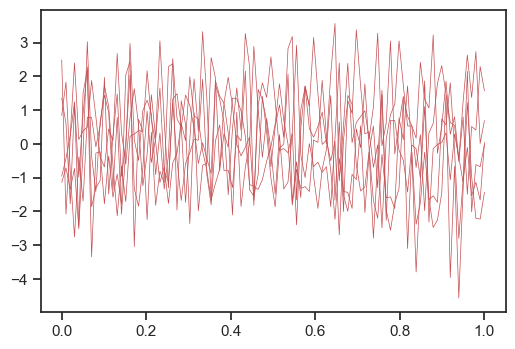

In [8]:
# kernel for f_1
k1 = GPy.kern.StdPeriodic(1)
k1.period = 0.1
k1.lengthscale = 0.1
k1.variance = 2.0
# kernel for f_2
k2 = GPy.kern.RBF(1)
k2.lengthscale = 0.5
k2.variance = 1.0
# Sample
xs = np.linspace(0, 1, 100)
# The mean function at xs
ms = np.zeros(xs.shape)
# Find the covariance matrix. You need to add a small number
# to the diagonal to ensure numerical stability
nugget = 1e-6
K = k1.K(xs[:, None]) * k2.K(xs[:, None]) + nugget * np.eye(xs.shape[0])
# A multivariate normal that can be used to sample the function values
F = st.multivariate_normal(mean=ms.flatten(), cov=K)
# Take the function samples
f_samples = F.rvs(size=5)
# Plot the samples
fig, ax = plt.subplots()
ax.plot(xs, f_samples.T, 'r', lw=0.5);

## Problem 2

The National Oceanic and Atmospheric Administration (NOAA) has been measuring the levels of atmospheric CO2 at the Mauna Loa, Hawaii. The measurements start on March 1958 and go all the way to Janurary 2016.
The data can be found [here](http://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).
The Python script below, downloads and plots the data set.

In [9]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/mauna_loa_co2.txt"
download(url)

In [10]:
data = np.loadtxt('mauna_loa_co2.txt')

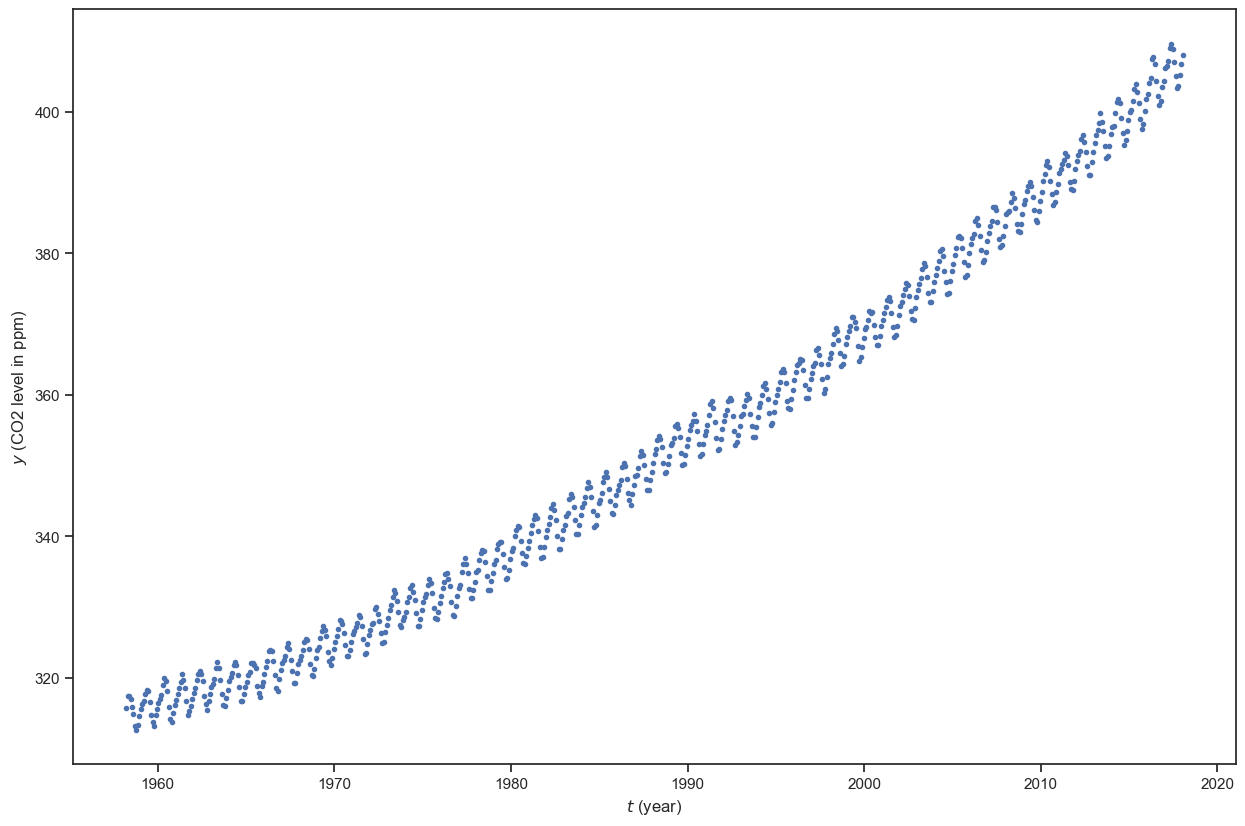

In [11]:
#load data 
t = data[:, 2][:, None]  #time (in decimal dates)
y = data[:, 4][:, None]  #CO2 level (mole fraction in dry air, micromol/mol, abbreviated as ppm)
fig, ax = plt.subplots(1, figsize = (15, 10), dpi=100)
ax.plot(t, y, '.')
ax.set_xlabel('$t$ (year)')
ax.set_ylabel('$y$ (CO2 level in ppm)');

Overall, we observe a steady growth of CO2 levels. The wiggles correspond to seasonal changes. Since the vast majority of the population inhabits the Northen hemisphere, fuel consumption goes up during the Northen winters and CO2 emissions follow. Our goal is to study this dataset with Gaussian process regression. Specifically we would like to predict the evolution of the CO2 levels from Feb 2018 to Feb 2028 and quantify our uncertainty about this prediction.

It's always a good idea to work with at scaled version of the inptus and the outputs. We are going to scale the times as follows:

$$
t_s = t - t_{\min}.
$$

So, time is still in fractional years, but we start counting at zero instead of 1950.
We scale the $y$'s as:

$$
y_s = \frac{y - y_{\min}}{y_{\max}-y_{\min}}.
$$

This takes all the $y$ between $0$ and $1$.
Here is how the scaled data look like:

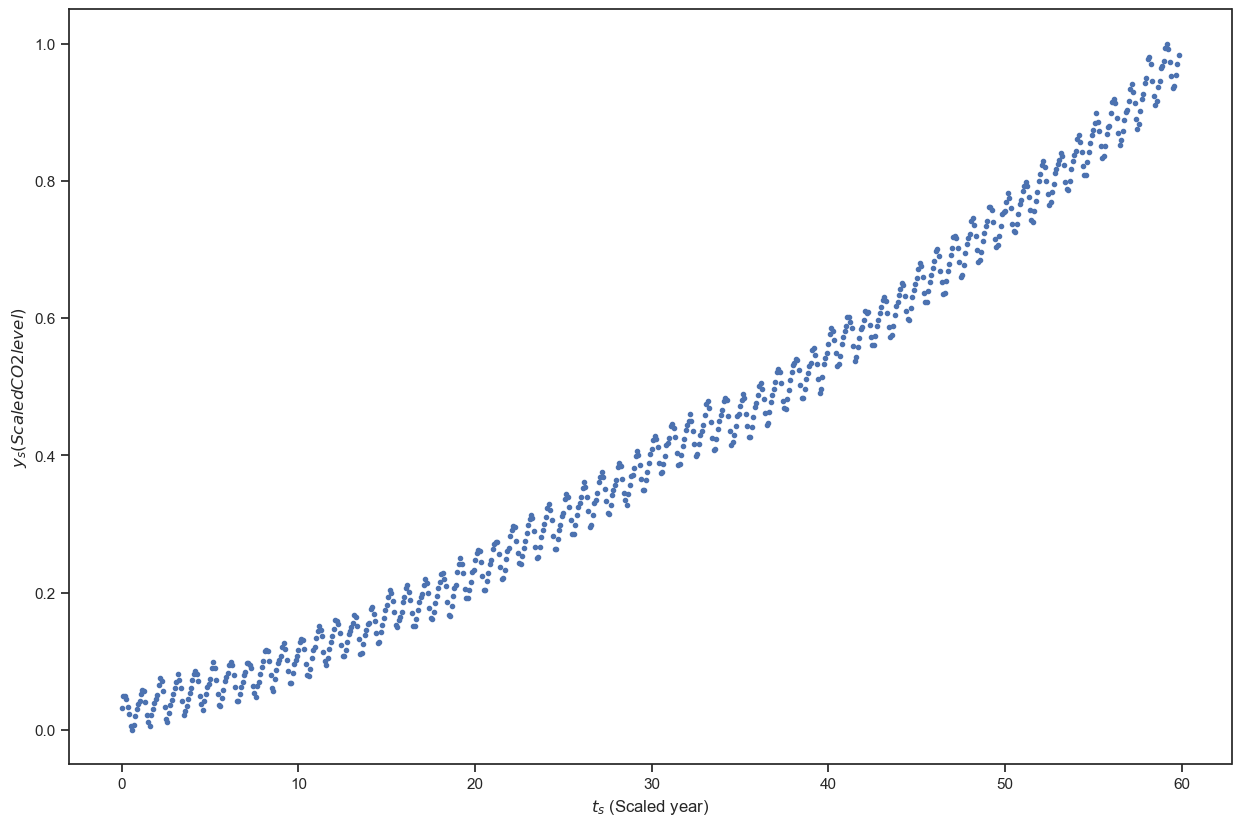

In [12]:
t_s = t - t.min()
y_s = (y - y.min()) / (y.max() - y.min())
fig, ax = plt.subplots(1, figsize = (15, 10), dpi=100)
ax.plot(t_s, y_s, '.')
ax.set_xlabel('$t_s$ (Scaled year)')
ax.set_ylabel('$y_s (Scaled CO2 level)$');

In what follows, just work with the scaled data as you develop your model.
Scale back to the original units for your final predictions.

## Part A - Naive approach

Use a zero mean Gaussian process with a squared exponential covariance function to fit the data and make the required prediction (ten years after the last observation).

**Answer:**

In [13]:
# Your code here
#naive_model = ?

# Define the covariance function
k = GPy.kern.RBF(1)
k.lengthscale = 1.0
k.variance = 1.0
naive_model = GPy.models.GPRegression(t_s, y_s, k)

Predict everything:

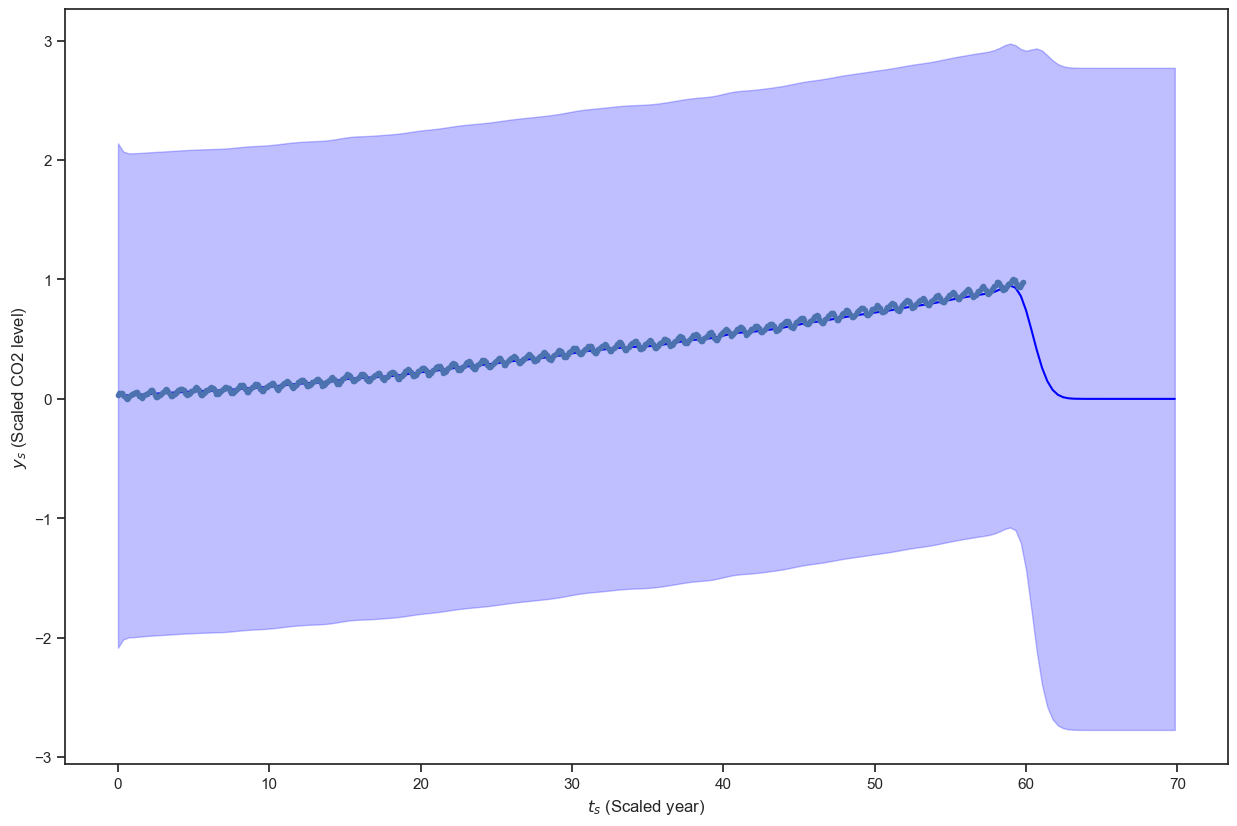

In [14]:
tss = np.linspace(0, t_s.max() + 10, 200)[:, None]
ys, vs = naive_model.predict(tss)
ls = ys - 1.96 * np.sqrt(vs)
us = ys + 1.96 * np.sqrt(vs)
fig, ax = plt.subplots(1, figsize = (15, 10), dpi=100)
ax.plot(tss, ys, color='blue', label='Posterior mean')
ax.fill_between(tss.flatten(), ls.flatten(), us.flatten(), color='blue', alpha=0.25)
ax.plot(t_s, y_s, '.', label='Scaled observed data')
ax.set_xlabel('$t_s$ (Scaled year)')
ax.set_ylabel('$y_s$ (Scaled CO2 level)');

Notice that the squared exponential covariance caputes the long terms, but it fails to capture the seasonal fluctuations. As a matter of fact the seasonabl fluctions as treated as noise. This is clearly false. How can we fix it?

In [15]:
naive_model.optimize(messages=True)
print(naive_model)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0005  -7.640011e+02   1.044462e+05 
    01s28  0036  -1.691471e+03   1.347916e-09 
Runtime:     01s28
Optimization status: Converged


Name : GP regression
Objective : -1691.4706770086377
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.4834955990989282  |      +ve      |        
  rbf.lengthscale          |   32.837072239780646  |      +ve      |        
  Gaussian_noise.variance  |  0.00049651434061977  |      +ve      |        


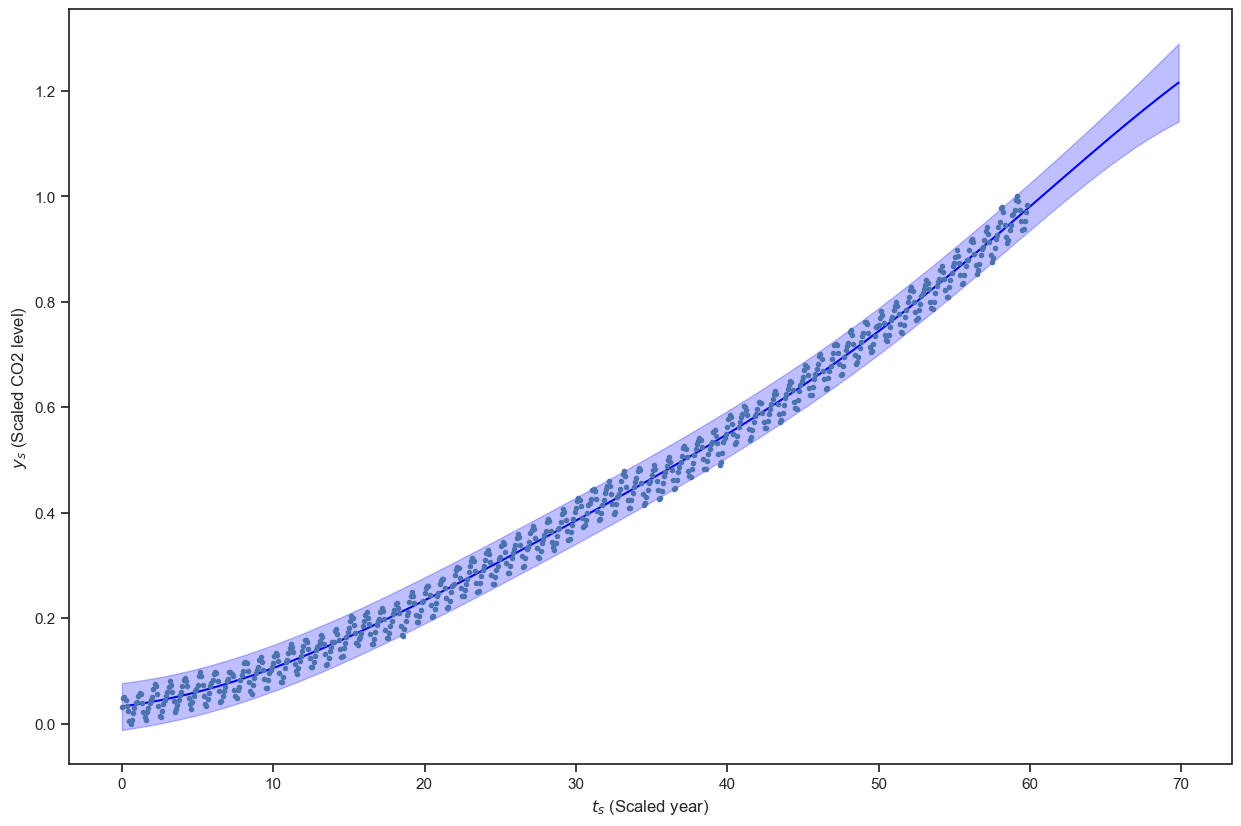

In [16]:
tss = np.linspace(0, t_s.max() + 10, 200)[:, None]
ys, vs = naive_model.predict(tss)
ls = ys - 1.96 * np.sqrt(vs)
us = ys + 1.96 * np.sqrt(vs)
fig, ax = plt.subplots(1, figsize = (15, 10), dpi=100)
ax.plot(tss, ys, color='blue', label='Posterior mean')
ax.fill_between(tss.flatten(), ls.flatten(), us.flatten(), color='blue', alpha=0.25)
ax.plot(t_s, y_s, '.', label='Scaled observed data')
ax.set_xlabel('$t_s$ (Scaled year)')
ax.set_ylabel('$y_s$ (Scaled CO2 level)');

## Part B - Improving the prior covariance

Now use the ideas of Problem 1, to come up with a covariance function that is exhibits the following characteristics clearly visible in the data (call $f(x)$ the scaled CO2 level.
+ $f(x)$ is smooth
+ $f(x)$ has a clear trend with a multi-year lengthscale (it is also an increasing trend, but we are not going to impose this)
+ $f(x)$ has seasonal fluctations with a period of one year
+ $f(x)$ exhibits small fluctiations within its period.

Use summation and multiplication of simple covariance functions to create a covariance function that exhibits these trends.
Sample a few times from it.

Hint: Do not attempt to fit the data in any way. Just try to find a covariance function that has the right features. We also do not care about getting the parameters 100% right at this point. The parameters will be optimized later.

**Answer:**

In [17]:
k1 = GPy.kern.RBF(1)
k1.lengthscale = 33
k1.variance = 0.5
k2 = GPy.kern.StdPeriodic(1)
k2.period = 1.0
k2.lengthscale = 0.3
k2.variance = 0.1
k3 = GPy.kern.Linear(1)

## Part C - Predicting the future

Use a zero mean Gaussian process with the covariance function you picked above to do Gaussian process regression
and make the required prediction (ten years after the last observation).

**Answer:**

In [18]:
better_model = GPy.models.GPRegression(t_s, y_s, k1 * k2 + k3)

better_model.optimize(messages=True)
print(better_model)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s13  0002   4.231697e+02   7.775081e+04 
    02s19  0031  -2.604845e+03   1.307702e+03 
    08s37  0124  -2.729034e+03   1.093663e+00 
    09s43  0140  -2.729153e+03   2.542454e+00 
    10s74  0160  -2.729159e+03   2.990527e-01 
Runtime:     10s74
Optimization status: Converged


Name : GP regression
Objective : -2729.159101766952
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.                    |                   value  |  constraints  |  priors
  sum.mul.rbf.variance              |     0.11412119274074992  |      +ve      |        
  sum.mul.rbf.lengthscale           |      10.282660408803233  |      +ve      |        
  sum.mul.std_periodic.variance     |     0.05058510556663031  |      +ve      |        
  sum.mul.std_periodic.period       |      0.9990725651545319  |      +ve      |        
  sum.mul.std_periodic.lengthscale

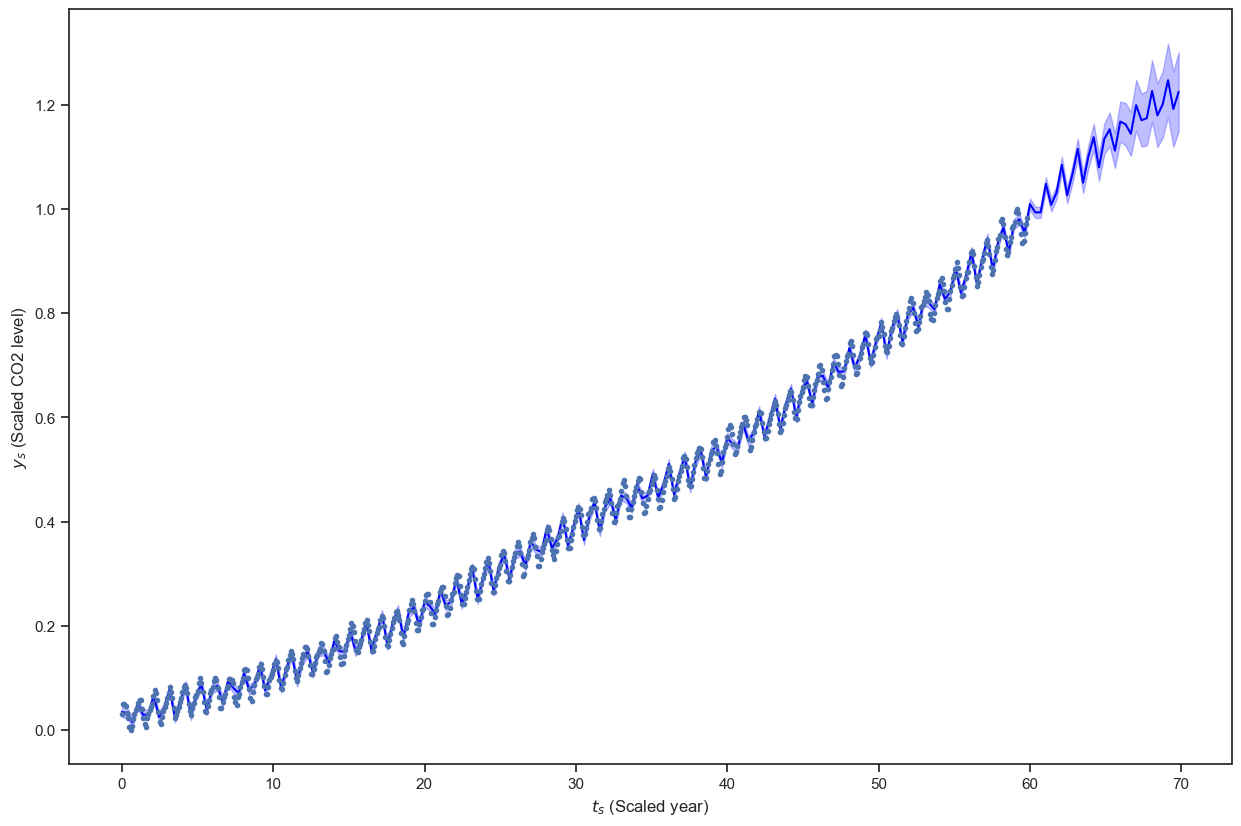

In [19]:
tss = np.linspace(0, t_s.max() + 10, 200)[:, None]
ys, vs = better_model.predict(tss)
ls = ys - 1.96 * np.sqrt(vs)
us = ys + 1.96 * np.sqrt(vs)
fig, ax = plt.subplots(1, figsize = (15, 10), dpi=100)
ax.plot(tss, ys, color='blue', label='Posterior mean')
ax.fill_between(tss.flatten(), ls.flatten(), us.flatten(), color='blue', alpha=0.25)
ax.plot(t_s, y_s, '.', label='Scaled observed data')
ax.set_xlabel('$t_s$ (Scaled year)')
ax.set_ylabel('$y_s$ (Scaled CO2 level)');

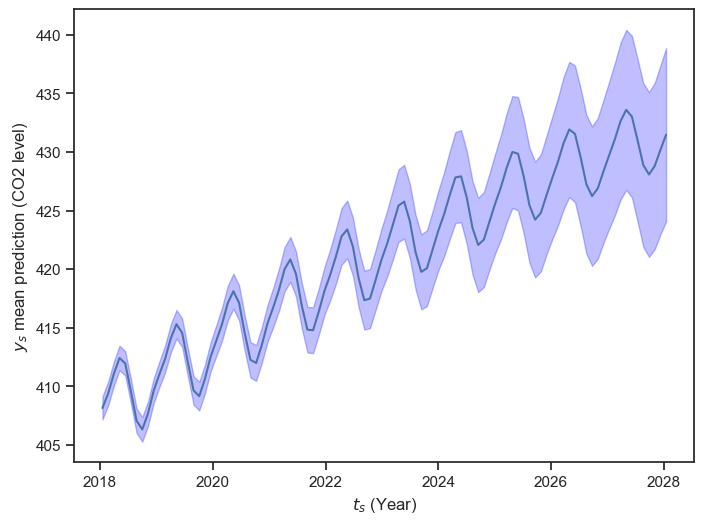

In [20]:
tss = np.linspace(t_s.max(), t_s.max() + 10, 100)[:, None]
ys, vs = better_model.predict(tss)
ls = ys - 1.96 * np.sqrt(vs)
us = ys + 1.96 * np.sqrt(vs)
fig, ax = plt.subplots(1, figsize = (8, 6), dpi=100)
ax.fill_between(t.min() + tss.flatten(),
                ls.flatten() * (y.max() - y.min()) + y.min(),
                us.flatten() * (y.max() - y.min()) + y.min(),
                color='blue',
                alpha=0.25)
ax.plot(t.min() + tss,
        ys * (y.max() - y.min()) + y.min())
ax.set_xlabel('$t_s$ (Year)')
ax.set_ylabel('$y_s$ mean prediction (CO2 level)');

## Part D - Bayesian information criterion

As we have seen in earlier lectures, the Bayesian informationc criterion (BIC), see [this](https://en.wikipedia.org/wiki/Bayesian_information_criterion), can bse used to compare two models.
The criterion says that one should:
+ fit the models with maximum likelihood,
+ and compute the quantity:

$$
\text{BIC} = d\ln(n) - 2\ln(\hat{L}),
$$

where $d$ is the number of model parameters, and $\hat{L}$ the maximum likelihood.
+ pick the model with the smallest BIC.

Use BIC to show that the model you constructed in Part C is indeed better than the naïve model of Part A.

Hint: Do a ``help(GPy.models.GPRegression)`` and you will find a way to get both the number of parameters and the log likelihood. Ask on piazza if you can't find it - or Google it.

**Answer:**

In [21]:
print(naive_model.num_params * np.log(naive_model.num_data) - 2 * naive_model.log_likelihood())
print(better_model.num_params * np.log(better_model.num_data) - 2 * better_model.log_likelihood())

-3369.7856313018333
-5445.162480818462


## Part E - Plot samples from the posterior Gaussian process

Using the model of Part C, plot 5 samples from the posterior Gaussian process between 2018 and 2028.

Hint: You need to use ``GPy.models.GPRegression.posterior_samples_f``.

**Answer:**

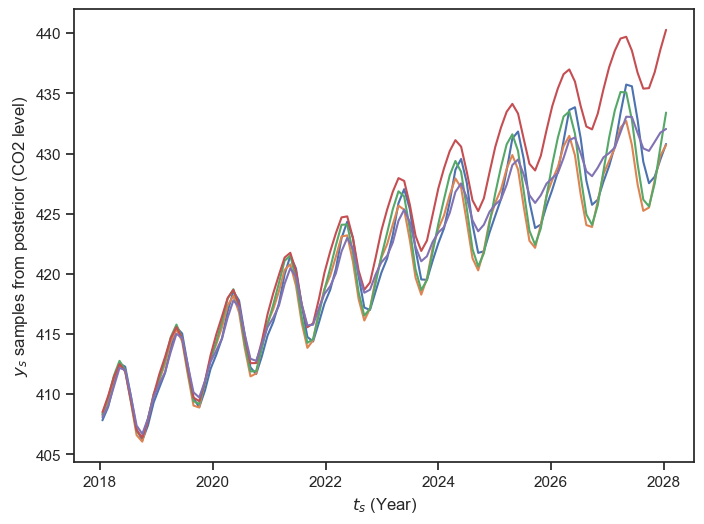

In [22]:
tss = np.linspace(t_s.max(), t_s.max() + 10, 100)[:, None]
f_post_samples = better_model.posterior_samples_f(tss, 5)
fig, ax = plt.subplots(1, figsize = (8, 6), dpi=100)
ax.plot(t.min() + tss, f_post_samples[:, 0, :] * 
        (y.max() - y.min()) + y.min())
ax.set_xlabel('$t_s$ (Year)')
ax.set_ylabel('$y_s$ samples from posterior (CO2 level)');

## Problem 3 - Using Bayesian Global optimization to calibrate an expensive physical model

This is Example 3.1 of [(Tsilifis, 2014)](http://arxiv.org/abs/1410.5522).

Consider the catalytic
conversion of nitrate ($\mbox{NO}_3^-$) to nitrogen ($\mbox{N}_2$) and other
by-products by electrochemical means.
The mechanism that is followed is complex and not well understood.
The experiment of [(Katsounaros, 2012)](http://www.sciencedirect.com/science/article/pii/S0013468612005208) confirmed the
production of nitrogen ($\mbox{N}_2$), ammonia
($\mbox{NH}_3$), and nitrous oxide ($\mbox{N}_2\mbox{O}$) as final products
of the reaction, as well as the intermediate production of nitrite ($\mbox{NO}_2^-$).
The data are reproduced in [Comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values) (CSV) and stored in
[catalysis.csv](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/catalysis.csv).
The time is measured in minutes and the conentrations are measured in $\mbox{mmol}\cdot\mbox{L}^{-1}$.
Let's load the data into this notebook using the [Pandas](http://pandas.pydata.org) Python module:

In [23]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/catalysis.csv"
download(url)

In [24]:
# Load the data
import pandas as pd
catalysis_data = pd.read_csv('catalysis.csv')
catalysis_data

,Time,NO3,NO2,N2,NH3,N2O
0,0,500.00,0.00,0.00,0.00,0.00
1,30,250.95,107.32,18.51,3.33,4.98
2,60,123.66,132.33,74.85,7.34,20.14
3,90,84.47,98.81,166.19,13.14,42.10
4,120,30.24,38.74,249.78,19.54,55.98
5,150,27.94,10.42,292.32,24.07,60.65
6,180,13.54,6.11,309.50,27.26,62.54


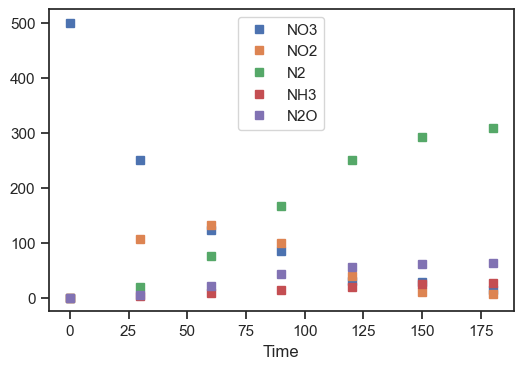

In [25]:
catalysis_data.plot(style='s', x=0);

The theory of catalytic reactions guarantees that the total mass must be conserved.
However, this is not the case in our dataset:

In [26]:
catalysis_data.sum(axis=1)

0    500.00
1    415.09
2    418.32
3    494.71
4    514.28
5    565.40
6    598.95
dtype: float64

This inconsistency suggests the existence of an intermediate unobserved reaction product X.
[(Katsounaros, 2012)](http://www.sciencedirect.com/science/article/pii/S0013468612005208) suggested that the following reaction path shown in the following figure.

The dynamical system associated with the reaction is:

$$
\begin{array}{cc}
\frac{d \left[\mbox{NO}_3^-\right]}{dt} &= -k_1\left[\mbox{NO}_3^-\right], \\
\frac{d\left[\mbox{NO}_2^-\right]}{dt} &= k_1\left[\mbox{NO}_3^-\right] - (k_2 + k_4 +
k_5)[\mbox{NO}_2^-], \\
\frac{d \left[\mbox{X}\right]}{dt} &= k_2 \left[\mbox{NO}_2^-\right] - k_3 [X],\\
\frac{d \left[\mbox{N}_2\right]}{dt} &= k_3 \left[\mbox{X}\right], \\
\frac{d \left[\mbox{NH}_3\right]}{dt} &= k_4 \left[\mbox{NO}_2^-\right],\\
\frac{d \left[\mbox{N}_2O\right]}{dt} &= k_5 \left[\mbox{NO}_2^-\right],
\end{array}
$$

where $[\cdot]$ denotes the concentration of a quantity, and
$k_i > 0$, $i=1,...5$ are the *kinetic rate constants*.

In this problem, I am going to guide you through the calibration of the parameters of this model so that we match the observations.
These problems are also known as *inverse problems*.
The problem can, and should, be formulated in a Bayesian way.
However, in this homework problem we are going to do it using a classical loss-minimization approach.
We will discuss the Bayesian approach for calibrating the same model in a later lecture.

Before you proceed, please read a little bit about the "classical theory of inverse problems:"

### Classical theory of inverse problems

Suppose that you have a model (any model really) that predicts a quantity of interest.
Let's assume that this model has parameters that you do not know.
These parameters could be simple scalars (mass, spring constant, dumping coefficients, etc.) or it could be also be functions (initial conditions, boundary values, spatially distributed constitutive relations, etc.)
Let's denote all these parameters with the vector $x$.
Assume that:

$$
x\in\mathcal{X} \subset\mathbb{R}^d.
$$

Now, let's say we perform an experiment that measures a *noisy* vector:

$$
y\in\mathcal{Y}\subset \mathbb{R}^m.
$$

Assume that, you can use your model *model* to predict $y$.
It does not matter how complicated your model is.
It could be a system of ordinary differential or partial differential equations, or something more complicated.
If it predicts $y$, you can always think of it as a function from the unknown parameter space $\mathcal{X}$ to the space of $y$'s, $\mathcal{Y}\subset\mathbb{R}^m$.
That is, you can think of it as giving rise to a function:

$$
f :\mathcal{X} \rightarrow \mathcal{Y}.
$$

The **inverse problem**, otherwise known as the **model calibration** problem is to find the best $x\in\mathcal{X}$ so that:

$$
f(x) \approx y.
$$

### Formulation of Inverse Problems as Optimization Problems
Saying that $f(x)\approx y$ is not an exact mathematical statement.
What does it really mean for $f(x)$ to be close to $y$?
To quantify this, let us introduce a *loss metric*:

$$
\ell: \mathcal{Y}\times\mathcal{Y}\rightarrow \mathbb{R},
$$

such that $\ell(f(x),y)$ is how much our prediction is off if we chose the input $x\in\mathcal{X}$.
Equiped with this loss metric, we can formulate the mathematical problem as:

$$
\min_{x\in\mathcal{X}} \ell(f(x),y).
$$

#### The Square Loss
The choice of the metric is somewhat subjective (it depends on what it means to be wrong in your problem).
However, a very common assumption is that to take the *square loss*:

$$
\ell(f(x), y) = \frac{1}{2}\parallel f(x) - y\parallel_2^2 = \frac{1}{2}\sum_{i=1}^m\left(f_i(x)-y_i\right)^2.
$$

For this case, the inverse problem can be formulated as:

$$
\min_{x\in\mathcal{X}}\frac{1}{2}\parallel f(x) - y\parallel_2^2.
$$

#### Solution Methodologies
We basically have to solve an optimization problem.
For the square loss function, if $f(x)$ is linear, then you get the classic least squares problem which has a known solution.
Otherwise, you get what is known as *generalized least squares*.
There are many algorithms that you could use this problem.
Several are implemented in [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html).
If you are able to implement your model as a simple python function, then you can use them.
Alternatively, and this is what we are going to do here, we could use Bayesian global optimization instead.
The absolutely, essential thing that you need to provide to these methods is the function they are optimizing, i.e.,

$$
L(x,y) = \ell(f(x),y).
$$

### Back to the catalysis model

Let's now formulate the calibration problem for the catalysis model.
We proceed in several steps.

#### Step 1: Making our life easier by simplifying the notation
Note that this is actually a linear system.
To simplify our notation, let's define:

$$
\begin{array}{ccc}
z_1 &:=& \left[\mbox{NO}_3^-\right],\\
z_2 &:=& \left[\mbox{NO}_2^-\right],\\
z_3 &:=& \left[\mbox{X}\right],\\
z_4 &:=& \left[\mbox{N}_2\right],\\
z_5 &:=& \left[\mbox{NH}_3\right],\\
z_6 &:=& \left[\mbox{N}_2O\right],
\end{array}
$$

the vector:

$$
z = (z_1,z_2,z_3,z_4,z_5,z_6),
$$

and the matrix:

$$
A(k_1,\dots,k_5) = \left(\begin{array}{cccccc}
-k_1 & 0 & 0 & 0 & 0 & 0\\
k_1 & -(k_2+k_4+k_5) & 0 & 0 & 0 & 0\\
0 & k_2 & -k_3 & 0 & 0 & 0\\
0 & 0 & k_3 & 0 & 0 & 0\\
0 & k_4 & 0 & 0 & 0 & 0\\
0 & k_5 & 0 & 0 & 0 & 0
\end{array}\right)\in\mathbb{R}^{6\times 6}.
$$

With these definitions, the dynamical system becomes:

$$
\dot{z} = A(k_1,\dots,k_5)z,
$$

with initial conditions

$$
z(0) = z_0 = (500, 0, 0, 0, 0, 0)\in\mathbb{R}^6,
$$

read directly from the experimental data.
What we are definitely going to need is a solver for this system.
That's easy.
Let's denote the solution of the system at time $t$ by:

$$
z(t;k_1,\dots,k_5).
$$

#### Step 2: Scale the unknown parameters to your best of your abilities
The constraints you have on your parameters, the better.
If you do have constraints, you would have to use constrained optimization algorithms.
The way you scale things depend on the problem.
Here we would think as follows:

+ $k_i$ has units of inverse time. It is proparly appropriate to scale it with the total time which is 180 minutes.
So, let's just multiply $k_i$ with 180. This makes the resulting variable dimensionless:

$$
\hat{x}_i = 180k_i.
$$

+ $k_i$ is positive, therefore $\hat{x_i}$ must be positive.
So, let's just work with the logarithm of $\hat{x_i}$:

$$
x_i = \log \hat{x_i} = \log 180k_i.
$$

+ define the parameter vector:

$$
x = (x_1,\dots,x_5)\in\mathcal{X} = \mathbb{R}^5.
$$

From now on, we will write

$$
A = A(x),
$$

for the matrix of the dynamical system, and

$$
z = z(t;x),
$$

for the solution at $t$ given that the parameters are $x$.

#### Step 3: Making the connection between our model and the experimental measurements
Our experimental data include measurements of everything except $z_3$ at times six (6) time instants:

$$
t_j = 30j\;\mbox{minutes},
$$

$j=1,\dots,6$.

Now, let $Y\in\mathbb{R}^{5\times 6}$ be the experimental measurements:

In [27]:
catalysis_data[1:]

,Time,NO3,NO2,N2,NH3,N2O
1,30,250.95,107.32,18.51,3.33,4.98
2,60,123.66,132.33,74.85,7.34,20.14
3,90,84.47,98.81,166.19,13.14,42.10
4,120,30.24,38.74,249.78,19.54,55.98
5,150,27.94,10.42,292.32,24.07,60.65
6,180,13.54,6.11,309.50,27.26,62.54


You can think of the measurements as vector by flattening the matrix:

$$
y = \operatorname{vec}(Y)\in\mathbb{R}^{30}.
$$

Note that ``vec`` is the vectorization operator.

What is the connection between the solution of the dynamical system $z(t,x)$ and the experimental data?
It is as follows:

$$
\begin{array}{ccc}
z_1(30j;x) &\longrightarrow& Y_{j1},\\
z_2(30j;x) &\longrightarrow& Y_{j2},\\
z_4(30j;x) &\longrightarrow& Y_{j3},\\
z_5(30j;x) &\longrightarrow& Y_{j4},\\
z_6(30j;x) &\longrightarrow& Y_{j5},
\end{array}
$$

for $j=1,\dots,6$.

We are now ready to define a function:

$$
f:\mathcal{X} \rightarrow \mathcal{Y}=\mathbb{R}^{30}_+,
$$

as follows:
+ Define the matrix function:

$$
F:\mathcal{X} \rightarrow \mathbb{R}^{5\times 6},
$$

by:

$$
\begin{array}{ccccc}
F_{j1}(x) &=& z_1(30j;x)&\longrightarrow& Y_{j1},\\
F_{j2}(x) &=& z_2(30j;x) &\longrightarrow& Y_{j2},\\
F_{j3}(x) &=& z_4(30j;x) &\longrightarrow& Y_{j3},\\
F_{j4}(x) &=& z_5(30j;x) &\longrightarrow& Y_{j4},\\
F_{j5}(x) &=& z_6(30j;x) &\longrightarrow& Y_{j5},
\end{array}
$$

+ And flatten that function:

$$
f(x) = \operatorname{vec}(F(x))\in\mathbb{R}^{30}.
$$

Now, we have made the connection with our theoretical formulation of inverse problems crystal clear.

#### Step 4: Programming our ODE solver and the loss function

In [51]:
import scipy.integrate

def A(x):
    """
    Return the matrix of the dynamical system.
    """
    # Scale back to the k's
    k = np.exp(x) / 180.
    res = np.zeros((6,6))
    res[0, 0] = -k[0]
    res[1, 0] = k[0]
    res[1, 1] = -(k[1] + k[3] + k[4])
    res[2, 1] = k[1]
    res[2, 2] = -k[2]
    res[3, 2] = k[2]
    res[4, 1] = k[3] 
    res[5, 1] = k[4]
    return res
    

def g(z, t, x):
    """
    The right hand side of the dynamical system.
    """
    return np.dot(A(x), z)


# The initial conditions
z0 = np.array([500., 0., 0., 0., 0., 0.])


# The times at which we need the solution (experimental times)
t_exp = np.array([30. * j for j in range(1, 7)])

# The experimental data as a matrix
Y = catalysis_data[1:].values[:, 1:]

# The experimental as a vector
y = Y.flatten()

# The full solution of the dynamical system
def Z(x, t):
    """
    Returns the solution for parameters x at times t.
    """
    return scipy.integrate.odeint(g, z0, t, args=(x,))


# The matrix function F (matches to Y)
def F(x, t):
    res = Z(x, t)
    return np.hstack([res[:, :2], res[:, 3:]])
    

# The function f (matches to y)
def f(x, t):
    return F(x, t).flatten()

# Finally, the loss function that we need to minimize over x:
def L(x, t, y):
    return 0.5 * np.sum((f(x, t) / 500. - y / 500.) ** 2) # We scale for numerical stability

#### Step 5: Minimize the loss function

Let's optimize with scipy.optimize:

In [52]:
import scipy.optimize

# Initial guess for x
x0 = -2.0 + 2.0 * np.random.rand(5)

# Optimize
res = scipy.optimize.minimize(L, x0, args=(t_exp, y))

print(res)

      fun: 0.16530886182294177
 hess_inv: array([[  4.63 ,   3.051,  -7.354,  -2.62 ,   0.414],
       [  3.051,  15.025, -22.573, -19.536,   6.352],
       [ -7.354, -22.573,  45.047,  26.367,  -3.92 ],
       [ -2.62 , -19.536,  26.367,  26.312,  -9.546],
       [  0.414,   6.352,  -3.92 ,  -9.546,  18.657]])
      jac: array([-1.332e-06,  5.174e-06,  1.695e-07,  1.043e-07,  3.515e-06])
  message: 'Optimization terminated successfully.'
     nfev: 492
      nit: 48
     njev: 82
   status: 0
  success: True
        x: array([ 1.926,  2.019,  1.425, -0.525,  0.265])


And here is how you can visualize the model with the "best" parameters:

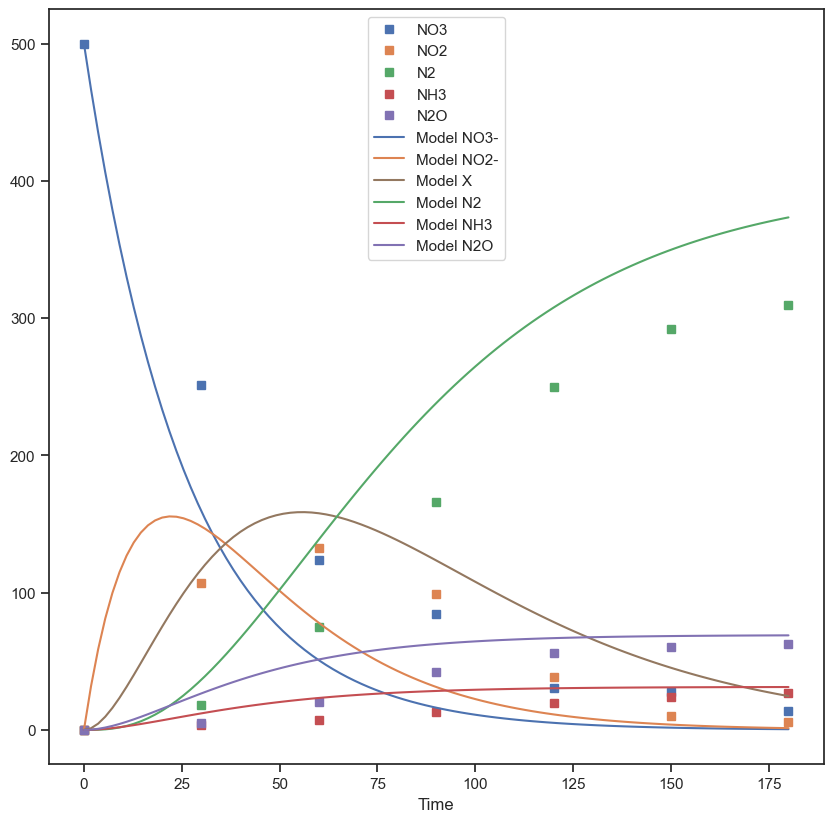

In [53]:
x = res.x
t = np.linspace(0, 180, 100)
x1 = np.array([1.359, 1.657, 1.347, -.16, -1.01])
Yp = Z(x, t)

fig, ax = plt.subplots(figsize=(10, 10))
catalysis_data.plot(ax=ax, style='s', x=0)
ax.plot(t, Yp[:, 0], color=sns.color_palette()[0], label='Model NO3-')
ax.plot(t, Yp[:, 1], color=sns.color_palette()[1], label='Model NO2-')
ax.plot(t, Yp[:, 2], color=sns.color_palette()[5], label='Model X')
ax.plot(t, Yp[:, 3], color=sns.color_palette()[2], label='Model N2')
ax.plot(t, Yp[:, 4], color=sns.color_palette()[3], label='Model NH3')
ax.plot(t, Yp[:, 5], color=sns.color_palette()[4], label='Model N2O')
plt.legend();

Note that the code above will not work every time... Some times it will work and sometimes it won't work.
Run it 3-4 times if it accidentally works.
There are several problems.
Here are the three most relevant in our context:
+ `scipy.optimize` needs the gradient of the loss function. Since we do not provide it, it tries to get it using numerical differentiation. Numerical differentiation introduces errors...
+ `scipy.optimize` find a local minimum of the loss function. This may actually be a bad local minimum.
+ okay, this particular model is not very computationally expensive. But imagine trying to calibrate a model that takes a while for a single evaluation (e.g., a finite element model). Then, using scipy.optimize (especially without supplying the derivatives), is doomed to fail.

To overcome these difficulties, you have to use Bayesian global optimization to solve the problem.
Note that in the hands-on activities, we introduced this code:

In [31]:
def ei(m, sigma, ymax, psi=0.):
    u = (m - ymax) / sigma
    ei = sigma * (u * st.norm.cdf(u) + st.norm.pdf(u))
    ei[sigma <= 0.] = 0.
    return ei

def maximize(f, gpr, domain, num_candidates=10000,
             alpha=ei, psi=0., max_it=6):
    """
    Optimize f using a limited number of evaluations.
    
    :param f:        The function to optimize.
    :param gpr:      A Gaussian process model to use for representing our state of knowldege.
    :param X_design: The set of candidate points for identifying the maximum.
    :param alpha:    The acquisition function.
    :param psi:      The parameter value for the acquisition function (not used for EI).
    :param max_it:   The maximum number of iterations.
    """
    af_all = []
    print('Iteration\tCurrent best objective \tCurrent acquisition func. value')
    dim = gpr.X.shape[1]
    for count in range(max_it):
        X_design = domain[:, 0] + \
                   (domain[:, 1] - domain[:, 0]) * \
                        np.random.rand(num_candidates, dim)
        m, sigma2 = gpr.predict(X_design)
        sigma = np.sqrt(sigma2)
        af_values = alpha(m, sigma, gpr.Y.max(), psi=psi)
        i = np.argmax(af_values)
        X = np.vstack([gpr.X, X_design[i:(i+1), :]])
        y = np.vstack([gpr.Y, [f(X_design[i, :])]])
        gpr.set_XY(X, y)
        # Uncomment the following to optimize the hyper-parameters
        gpr.optimize()
        idx_opt = np.argmax(gpr.Y.flatten())
        f_opt = gpr.Y[idx_opt, 0]
        print('{0:d}\t\t{1:1.2f}\t\t\t{2:1.2f}'.format(count + 1, f_opt, af_values[i, 0]))
    x_opt = np.array(gpr.X[idx_opt])
    return x_opt, f_opt, gpr

The code *maximizes* a function, but you want to *minimize* the loss.
To recast the problem as a maximization problem, you need to work with *minus the loss*.
Also, the code does not allow for a function with extra parameters (like the ``t_exp`` and the ``y`` we have for ``L``).
Here is the function that you should be optimizing:

In [32]:
h = lambda x: -L(x, t_exp, y)

## Part A - Perform multivariate Gaussian process regression on an initial set of data

We are going to search for the best parameters $x$ within the set $[-2,2]^5$.
Consider the following two datasets consisting of parameter and minus loss pairs:

In [33]:
# Initial training points
n_init_train = 100
X_init_train = -2.0 + 4.0 * np.random.rand(n_init_train, 5)
Y_init_train = np.array([h(x) for x in X_init_train])[:, None]

Use a squared exponential covariance function with automatic relevance determination to do Gaussian process regression with ``X_init_train`` and ``Y_init_train``.

Hint: You may want to experiment by constraining the likelihood noise of your model to be very small, say $10^{-6}$. This is because the observations of the loss do not really have any noise.

**Answer:**

In [100]:
import GPy

k = GPy.kern.RBF(5, ARD=True)
model_gp = GPy.models.GPRegression(X_init_train, Y_init_train, k)
model_gp.likelihood.variance.constrain_fixed = 1e-6
model_gp.optimize(messages=True)
print(model_gp)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s01  0005  -4.847377e+01   4.089505e+02 
    00s04  0016  -1.270668e+02   2.273658e+00 
    00s08  0028  -1.289944e+02   4.650525e-03 
    00s09  0033  -1.289948e+02   1.754517e-08 
Runtime:     00s09
Optimization status: Converged


Name : GP regression
Objective : -128.99475579742864
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     2.6980676847738763  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  2.012863935917454e-05  |      +ve      |        


## Part B - Inspecting your model

Use the lengthscale information to rank the model parameters according their effect on the calibration loss.

**Answer:**

In [101]:
#print(model_gp.kern.lengthscale)
print(model_gp.rbf.lengthscale)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                          1.870  |      +ve      |        
  [1]    |                          5.411  |      +ve      |        
  [2]    |                         13.619  |      +ve      |        
  [3]    |                          4.288  |      +ve      |        
  [4]    |                          5.783  |      +ve      |        


## Part C - Diagnostics

Here are some test data:

In [102]:
# Test points
n_test = 50
X_test = -2.0 + 4.0 * np.random.rand(n_test, 5)
Y_test = np.array([h(x) for x in X_test])[:, None]

Do the following:

+ Predictions vs observations plot
+ Standarized errors plot

**Answer:**

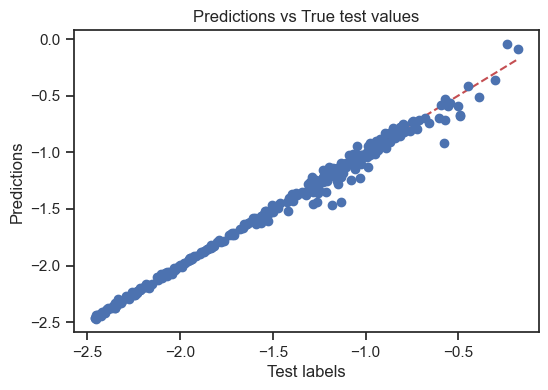

In [103]:
# predictions vs observations
from sklearn.metrics import mean_squared_error

Ntest = 300
Xtest = -2.0 + 4.0 * np.random.rand(Ntest, 5)
Ytest = np.array([h(x) for x in Xtest])[:, None]
Ytest_m, Ytest_v = model_gp.predict(Xtest, full_cov=False) 
error_m = np.sqrt( mean_squared_error(Ytest, Ytest_m) )

fig, ax = plt.subplots()
ys = np.linspace( np.min(Ytest), np.max(Ytest), 100 )
ax.plot(ys, ys, 'r--', label='$x=y$')
ax.plot(Ytest, Ytest_m, 'o')
ax.set_title('Predictions vs True test values')
ax.set_xlabel('Test labels')
ax.set_ylabel('Predictions');

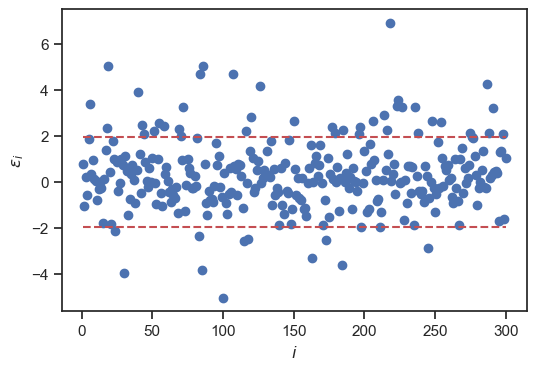

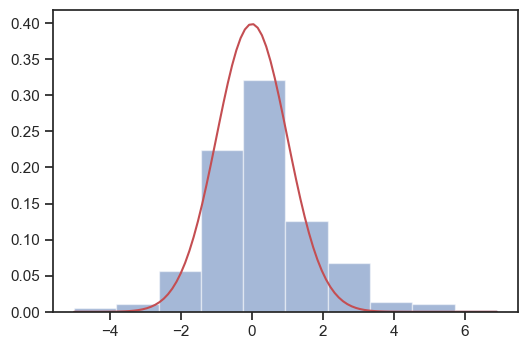

In [104]:
# standardized errors
se = (Ytest - Ytest_m) / np.sqrt(Ytest_v)
idx = np.arange(1, se.shape[0] + 1)

fig1, ax1 = plt.subplots()
ax1.plot(idx, se, 'o', label='Standarized errors')
ax1.plot(idx, 1.96 * np.ones(se.shape[0]), 'r--')
ax1.plot(idx, -1.96 * np.ones(se.shape[0]), 'r--')
ax1.set_xlabel('$i$')
ax1.set_ylabel('$\epsilon_i$');

fig2, ax2 = plt.subplots()
ax2.hist(se, alpha=0.5, density=True)
ee = np.linspace(se.min(), se.max(), 100)
ax2.plot(ee, st.norm.pdf(ee), 'r');

## Part D - Calibrate the model with Bayesian global optimization

Now use Bayesian global optimization with expected improvement to calibrate your model using the GP that you built above as the starting point.
Do not expect this to give you a perfect model.
But it will be better than nothing.
We will get the best possible model in the next homework assignment.

**Hint:** Here you basically need to read the docstring of ``maximize`` and use it correctly.

In [208]:
# For your convenience, the `domain` argument of minimize should be:
domain = np.array([[-2, 2], [-2, 2], [-2, 2], [-2, 2], [-2, 2]])
k1 = GPy.kern.RBF(5, ARD=True)
model_gp = GPy.models.GPRegression(X_init_train, Y_init_train, k1)
model_gp.likelihood.variance.constrain_fixed = 1e-6

In [209]:
x_opt, f_opt, gpr = maximize(h, model_gp, domain, num_candidates=100000,
             alpha=ei, psi=0., max_it=10);
print(gpr)
print(x_opt)

Iteration	Current best objective 	Current acquisition func. value
1		-0.22			0.67
2		-0.21			0.43
3		-0.19			0.20
4		-0.19			0.12
5		-0.19			0.06
6		-0.19			0.02
7		-0.19			0.01
8		-0.19			0.02
9		-0.19			0.10
10		-0.19			0.01

Name : GP regression
Objective : -124.84749627335928
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |      1.944272506828024  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0002581496405077019  |      +ve      |        
[ 1.733  1.845  1.987 -1.506 -0.197]


In [210]:
print(gpr.rbf.lengthscale)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                          1.689  |      +ve      |        
  [1]    |                          4.130  |      +ve      |        
  [2]    |                         21.911  |      +ve      |        
  [3]    |                          3.882  |      +ve      |        
  [4]    |                          6.384  |      +ve      |        


Use this code to plot your calibrated model:

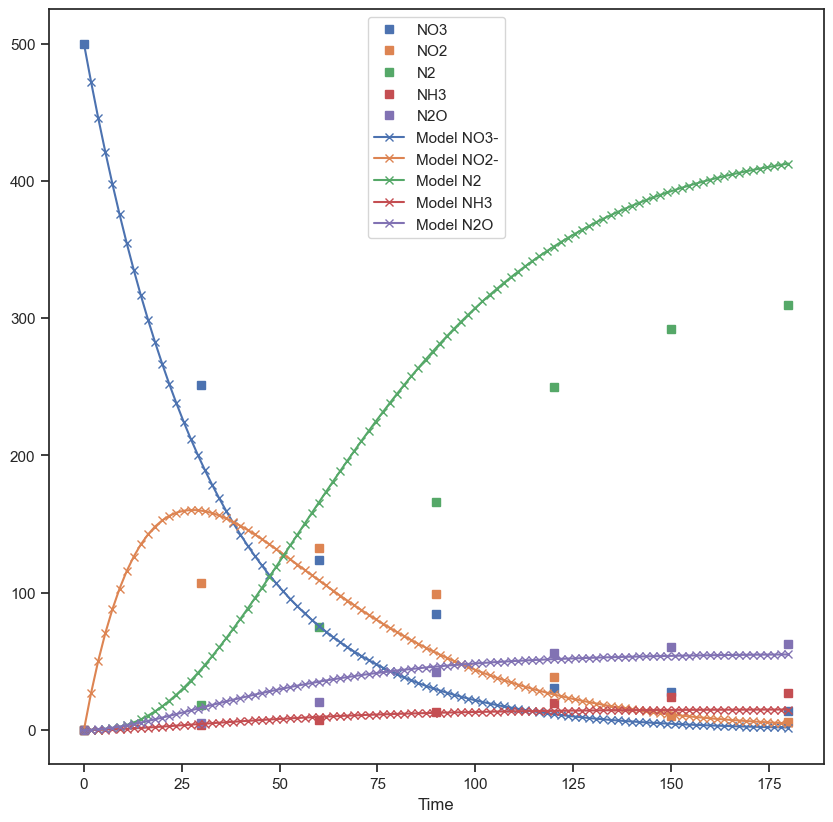

In [211]:
x = x_opt
t = np.linspace(0, 180, 100)
x1 = np.array([1.359, 1.657, 1.347, -.16, -1.01])
Yp = Z(x, t)

fig, ax = plt.subplots(figsize=(10, 10))
catalysis_data.plot(ax=ax, style='s', x=0)
ax.plot(t, Yp[:, 0], '-x', color=sns.color_palette()[0], label='Model NO3-')
ax.plot(t, Yp[:, 1], '-x', color=sns.color_palette()[1], label='Model NO2-')
ax.plot(t, Yp[:, 3], '-x', color=sns.color_palette()[2], label='Model N2')
ax.plot(t, Yp[:, 4], '-x', color=sns.color_palette()[3], label='Model NH3')
ax.plot(t, Yp[:, 5], '-x', color=sns.color_palette()[4], label='Model N2O')
plt.legend();

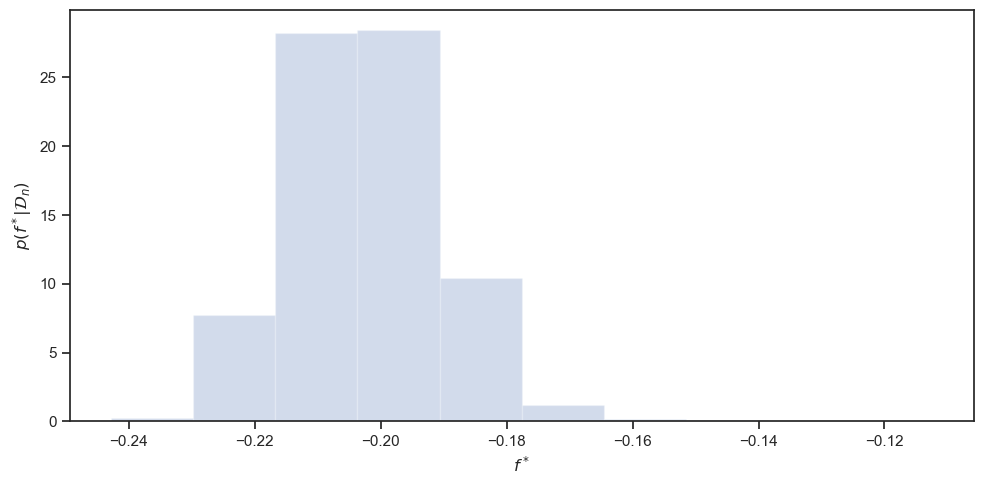

In [221]:
def plot_max(gpr, domain, n_samples=3000):
    """Plot histograms of the max of the function represented by the model gpr.
    
    Arguments
    gpr      -- A trained Gaussian process object.
    X_design -- A set of points to evaluate the response on.
    
    Keyword Arguments
    n_samples -- The number of samples to take to make the histograms.
    """
    X_design = domain[:, 0] + \
           (domain[:, 1] - domain[:, 0]) * \
                np.random.rand(n_samples, domain.shape[0])
    f_samples = gpr.posterior_samples_f(
        X_design,
        size=n_samples
    )[:, 0, :]
    max_f_samples = np.max(f_samples, axis=0)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(max_f_samples, density=True, alpha=0.25)
    ax.set_xlabel('$f^*$')
    ax.set_ylabel('$p(f^*|\mathcal{D}_n)$')
    
    plt.tight_layout()
    
    return fig, ax

plot_max(gpr, domain);